# Importing libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Reading file

In [ ]:
cars = pd.read_csv('/content/drive/MyDrive/craigslist (2)$.csv')

In [ ]:
cars.sample(5)

,model,odometer,price
5,2023 Ford F-250 Super Duty Lariat,8160.0,88995.0
210,2016 RAM 1500 pickup truck,NaN,9800.0
113,2012 chevy silverado 2500 hd,334950.0,12900.0
124,2012 Ford Fusion,NaN,3995.0
20,2023 GMC Sierra 3500HD Denali,20739.0,88995.0


# Analysing Price attribute

In [ ]:
cars.columns
cars['price'].describe()

count       210.000000
mean      22670.990476
std       25526.659897
min         300.000000
25%        5950.000000
50%       11900.000000
75%       33814.000000
max      159995.000000
Name: price, dtype: float64

Skewness: 2.038111
Kurtosis: 5.236486


'\nWe can observe that the distribution of prices shows a high positive skewness\nto the left (skew > 1). A kurtosis value of 5 is extremely high, meaning that\nthere is a profusion of outliers in the dataset. We need to do something.\n'

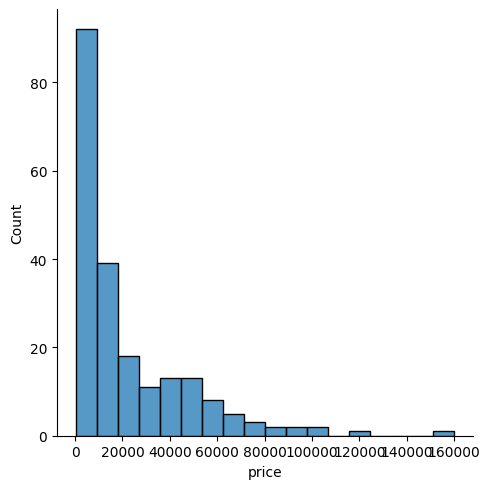

In [ ]:

sns.displot(cars['price'])
#skewness and kurtosis
print("Skewness: %f" % cars['price'].skew())
print("Kurtosis: %f" % cars['price'].kurt())

"""
We can observe that the distribution of prices shows a high positive skewness
to the left (skew > 1). A kurtosis value of 5 is extremely high, meaning that
there is a profusion of outliers in the dataset. We need to do something.
"""

A kurtosis value of 5 suggests a distribution that is very leptokurtic (more peaked) and has very heavy tails compared to the normal distribution. This could indicate the presence of outliers or extreme values in the data. It's important to analyze the data and understand the context to interpret the implications of such a high kurtosis value.

"\nWe see that the lesser is the odometer reading, the higher tends to be the price.\nPrice and odometer reading seem to be in an exponential relationship with negative\nexponent. It's a typical form of exponential decay.\n"

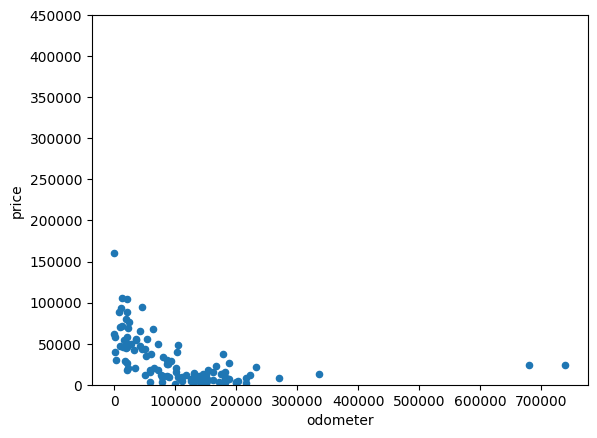

In [ ]:

# Scatter plot Odometer / Price
attrib = 'odometer'
data = pd.concat([cars['price'], cars[attrib]], axis=1)
data.plot.scatter(x=attrib, y='price', ylim=(0,450000));

"""
We see that the lesser is the odometer reading, the higher tends to be the price.
Price and odometer reading seem to be in an exponential relationship with negative
exponent. It's a typical form of exponential decay.
"""

In [ ]:
# Find most important features relative to target Price
print("Find most important features relative to target")
corr = cars.corr()
corr.sort_values(["price"])
print(corr.price)


Find most important features relative to target
odometer   -0.452322
price       1.000000
Name: price, dtype: float64


<ipython-input-7-f8cc5074b061>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cars.corr()


<ipython-input-8-7e40c9912518>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = cars.corr()


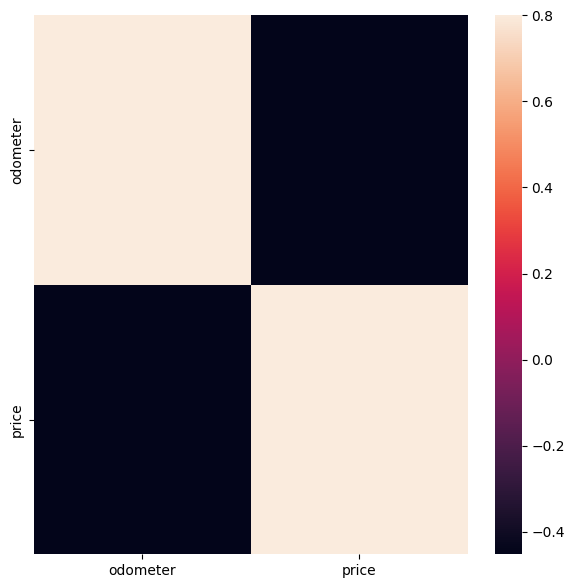

In [ ]:
# General correlation matrix
corrmat = cars.corr()
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=.8);


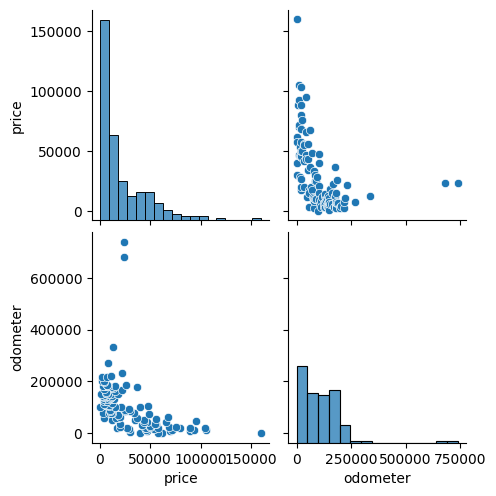

In [ ]:
# Scatter plot for numerical features
num_features = ["price", "odometer"]
sns.pairplot(cars[num_features], height = 2.5)
plt.show();

In [ ]:
# Checking for missing values -> no missing values
cars.isnull().sum()

model        0
odometer    97
price        3
dtype: int64

In [ ]:
mean = cars['odometer'].mean()
cars['odometer'].fillna(mean , inplace = True)

In [ ]:
mo = cars['price'].mean()
cars['price'].fillna(mo , inplace = True)

In [ ]:
# Checking for missing values -> no missing values
cars.isnull().sum()

model       0
odometer    0
price       0
dtype: int64

In [ ]:
# Checking for plausible values of numerical features -> we can see that the maximum value of mileage is 77milion km
# we need to fix these problems
cars.describe()

,odometer,price
count,213.000000,213.000000
mean,110750.948276,22670.990476
std,78764.517185,25345.403214
min,54.000000,300.000000
25%,86281.000000,5950.000000
50%,110750.948276,12000.000000
75%,110750.948276,33271.000000
max,739699.000000,159995.000000


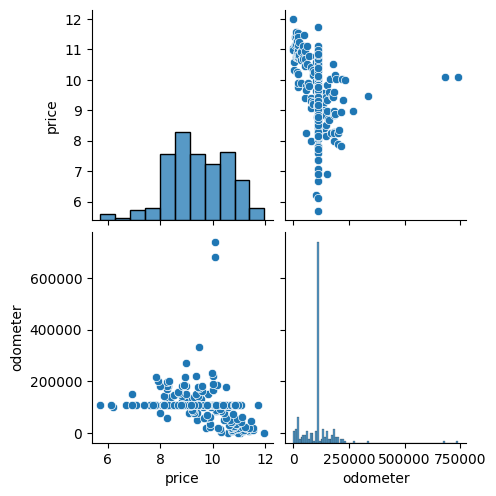

In [ ]:
# Scatter plot for numerical features
num_features = ["price", "odometer"]
sns.pairplot(cars[num_features], height = 2.5)
plt.show();

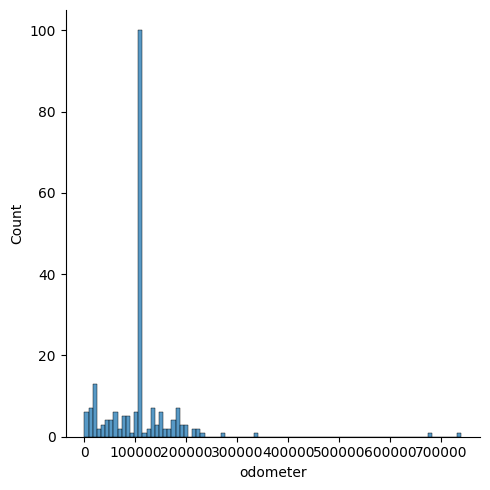

In [ ]:
# Record distribution over the odometer reading
sns.displot((cars["odometer"]))

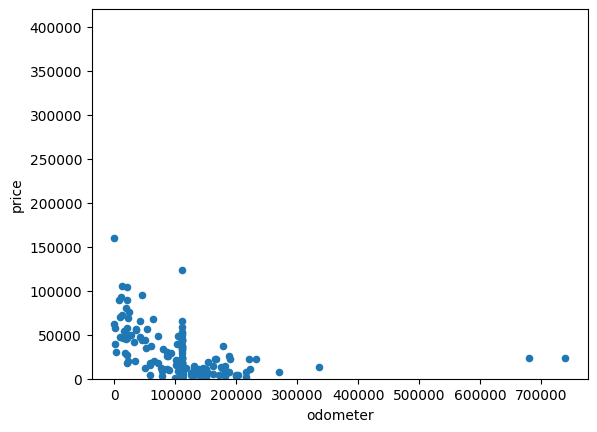

In [ ]:
# Bivariate analysis Price / odometer reading
attrib = 'odometer'
data = pd.concat([cars['price'], cars[attrib]], axis=1)
data.plot.scatter(x=attrib, y='price', ylim=(0,420000));

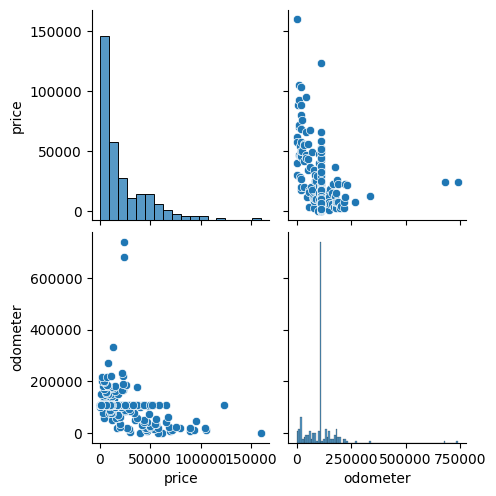

In [ ]:
# Scatter plot for numerical features after cleaning
num_features = ["price", "odometer"]
sns.pairplot(cars[num_features], height = 2.5)
plt.show();

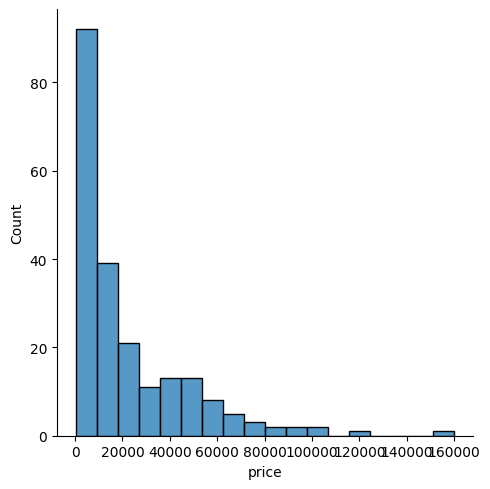

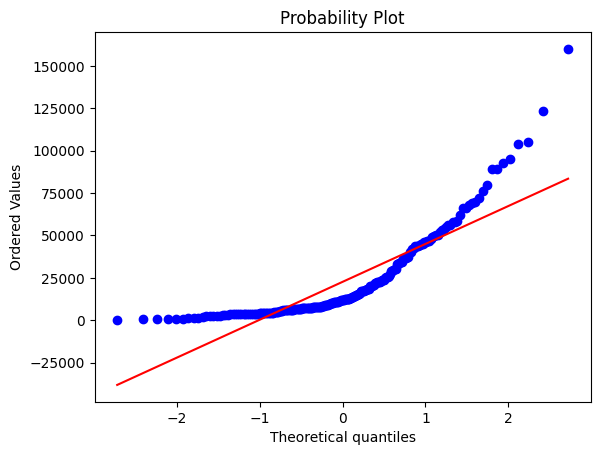

In [ ]:
# Distribution of prices
from scipy.stats import norm
from scipy import stats

# Using Histogram and normal probability plot
sns.displot(cars['price']);
fig = plt.figure()
res = stats.probplot(cars['price'], plot=plt)

In [ ]:
#applying log transformation
cars['price'] = np.log(cars['price'])

In [ ]:
X = cars.iloc[:,1:2]
y = cars.iloc[:,2:]
print(X)
print(y)

          odometer
0        54.000000
1       114.000000
2       148.000000
3      1689.000000
4      2833.000000
..             ...
208  110750.948276
209  110750.948276
210  110750.948276
211  110750.948276
212  110750.948276

[213 rows x 1 columns]
         price
0    11.034809
1    11.982898
2    10.968112
3    10.596510
4    10.308953
..         ...
208   8.516193
209   8.698681
210   9.190138
211   8.779557
212   7.374629

[213 rows x 1 columns]


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'X' contains your features and 'Y' contains your labels/targets

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cars['price'],cars['odometer'], test_size=0.2, random_state=42)

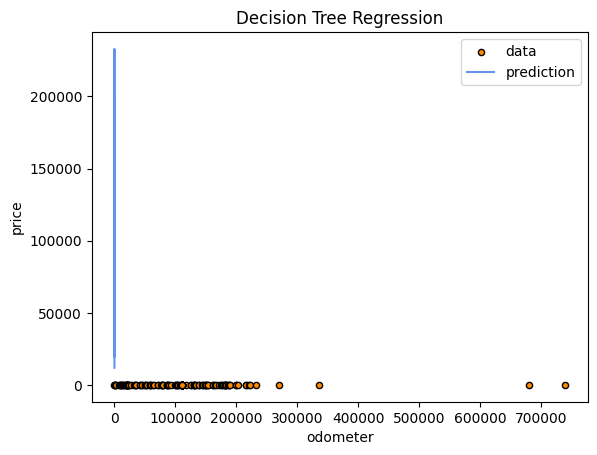

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model = DecisionTreeRegressor(max_depth=5)
model.fit(X, y)
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_test, color="cornflowerblue", label="prediction")
plt.xlabel("odometer")
plt.ylabel("price")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()